In [15]:
import torch
import pandas as pd
from torch.optim import Adam
from torch.nn import CrossEntropyLoss
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from models import SqueezeNet
from models import CNN_model
from data_preparation import load_dataset, augmentation, convert
from trainer import Trainer

In [3]:
#images, matched with labels
data = pd.read_csv('C:/Users/BOZ/Zoetis_BCS/CNN_dataset/training_labels2.csv',index_col=False)
data_path = 'C:/Users/BOZ/Zoetis_BCS/CNN_dataset/whole/'

In [4]:
#load data/labels from image folder and excel form, as training data/labels
train_x, val_x, train_y, val_y = load_dataset(img_names=data['image_names'], data_path=data_path, labels = data['new_label'].values)

100%|████████████████████████████████████████████████████████████████████████████████| 604/604 [00:09<00:00, 67.10it/s]


training set:  (604, 224, 224, 3) 	 trainng label:  (604,)
training set:  ((483, 224, 224, 3), (483,)) 	 testing set:  ((121, 224, 224, 3), (121,))


In [5]:
#expand the dataset by augmentation
train_x,train_y = augmentation(train_x,train_y)
#convert the data to torch tensors for training
train_x,train_y,val_x,val_y = convert(train_x,train_y,val_x,val_y)

100%|████████████████████████████████████████████████████████████████████████████████| 483/483 [00:12<00:00, 40.16it/s]


In [6]:
#training process
def train_evaluate(params,model):
    optimizer = Adam(model.parameters(), lr=params['lr'])
    criterion = CrossEntropyLoss()
    trainer = Trainer(model=model, optimizer=optimizer, criterion=criterion, train_x=train_x, train_y=train_y,val_x=val_x,val_y=val_y) 
    epochs, train_losses, train_accs, validation_accs, validation_losses, predictions_test = trainer.train_val(n_epochs=params['n_epochs'],batch_size=params['batch_size'])
    return epochs, (train_losses, train_accs), (validation_accs, validation_losses), predictions_test

In [7]:
# training params
params = {
          "lr": 0.00008, 
          "batch_size": 32, 
          "n_epochs": 20
         }
# traing and evaluating  process
model1 = CNN_model(num_classes=6)
model2 = SqueezeNet(version=1.0,num_classes=6)
epochs, (train_losses, train_accs), (validation_accs, validation_losses), predictions = train_evaluate(params,model1) 

  0%|                                                                                           | 0/76 [00:00<?, ?it/s]

epoch: 1   training loss:  1.632481625205592   training accuracy:  34.97807%
	 validation loss:  1.524971842765808 	 validation accuracy:  40.49587%


  0%|                                                                                           | 0/76 [00:00<?, ?it/s]

epoch: 2   training loss:  1.4172695686942653   training accuracy:  42.83169%
	 validation loss:  1.3433637619018555 	 validation accuracy:  47.10744%


  0%|                                                                                           | 0/76 [00:00<?, ?it/s]

epoch: 3   training loss:  1.2571277947802293   training accuracy:  46.50768%
	 validation loss:  1.1336079835891724 	 validation accuracy:  53.71901%


  0%|                                                                                           | 0/76 [00:00<?, ?it/s]

epoch: 4   training loss:  1.1481180465535115   training accuracy:  52.15186%
	 validation loss:  0.997664213180542 	 validation accuracy:  63.63636%


  0%|                                                                                           | 0/76 [00:00<?, ?it/s]

epoch: 5   training loss:  1.0027833541757183   training accuracy:  58.72533%
	 validation loss:  0.9209783673286438 	 validation accuracy:  63.63636%


  0%|                                                                                           | 0/76 [00:00<?, ?it/s]

epoch: 6   training loss:  0.8680157794764167   training accuracy:  65.72094%
	 validation loss:  0.8527757525444031 	 validation accuracy:  71.90083%


  0%|                                                                                           | 0/76 [00:00<?, ?it/s]

epoch: 7   training loss:  0.723883748838776   training accuracy:  73.37993%
	 validation loss:  0.7297486066818237 	 validation accuracy:  77.68595%


  0%|                                                                                           | 0/76 [00:00<?, ?it/s]

epoch: 8   training loss:  0.6056114688123527   training accuracy:  78.15515%
	 validation loss:  0.7270981073379517 	 validation accuracy:  76.85950%


  0%|                                                                                           | 0/76 [00:00<?, ?it/s]

epoch: 9   training loss:  0.5018449017876073   training accuracy:  82.36020%
	 validation loss:  0.6924892663955688 	 validation accuracy:  76.03306%


  0%|                                                                                           | 0/76 [00:00<?, ?it/s]

epoch: 10   training loss:  0.4604528875727403   training accuracy:  83.03728%
	 validation loss:  0.49397480487823486 	 validation accuracy:  88.42975%


  0%|                                                                                           | 0/76 [00:00<?, ?it/s]

epoch: 11   training loss:  0.34835667829764516   training accuracy:  87.93586%
	 validation loss:  0.408917635679245 	 validation accuracy:  90.08264%


  0%|                                                                                           | 0/76 [00:00<?, ?it/s]

epoch: 12   training loss:  0.3433031604478234   training accuracy:  87.94682%
	 validation loss:  0.5180131793022156 	 validation accuracy:  83.47107%


  0%|                                                                                           | 0/76 [00:00<?, ?it/s]

epoch: 13   training loss:  0.27235461908735725   training accuracy:  90.23849%
	 validation loss:  0.48825326561927795 	 validation accuracy:  87.60331%


  0%|                                                                                           | 0/76 [00:00<?, ?it/s]

epoch: 14   training loss:  0.23036656059373758   training accuracy:  92.59868%
	 validation loss:  0.3960016071796417 	 validation accuracy:  88.42975%


  0%|                                                                                           | 0/76 [00:00<?, ?it/s]

epoch: 15   training loss:  0.20074236743446244   training accuracy:  93.07566%
	 validation loss:  0.5393580198287964 	 validation accuracy:  86.77686%


  0%|                                                                                           | 0/76 [00:00<?, ?it/s]

epoch: 16   training loss:  0.15878517121860855   training accuracy:  95.43586%
	 validation loss:  0.5320125818252563 	 validation accuracy:  84.29752%


  0%|                                                                                           | 0/76 [00:00<?, ?it/s]

epoch: 17   training loss:  0.15573059277314888   training accuracy:  94.94243%
	 validation loss:  0.5998601317405701 	 validation accuracy:  85.95041%


  0%|                                                                                           | 0/76 [00:00<?, ?it/s]

epoch: 18   training loss:  0.13209424322274954   training accuracy:  95.63048%
	 validation loss:  0.6180562973022461 	 validation accuracy:  88.42975%


  0%|                                                                                           | 0/76 [00:00<?, ?it/s]

epoch: 19   training loss:  0.1014763554313073   training accuracy:  96.79276%
	 validation loss:  0.4811299443244934 	 validation accuracy:  86.77686%


100%|██████████████████████████████████████████████████████████████████████████████████| 76/76 [03:19<00:00,  2.63s/it]


epoch: 20   training loss:  0.1046497575007379   training accuracy:  96.71053%
	 validation loss:  0.5566480755805969 	 validation accuracy:  86.77686%


Text(0.5, 0, 'epoch')

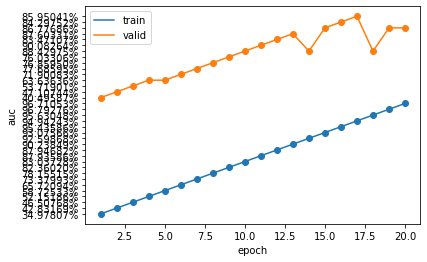

In [25]:
#epochs = np.arange(1, params['n_epochs']+1, 1)
plt.plot(epochs, train_accs, label="train")
plt.plot(epochs, validation_accs, label="valid")
plt.scatter(epochs, train_accs)
plt.scatter(epochs, validation_accs)
plt.legend()
plt.ylabel("auc")
plt.xlabel("epoch")

Text(0.5, 0, 'epoch')

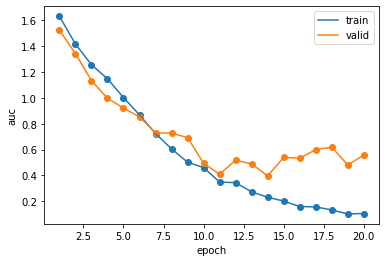

In [26]:
#epoch_list = np.arange(1, N_EPOCHS+1, 1)
plt.plot(epochs, train_losses, label="train")
plt.plot(epochs, validation_losses, label="valid");
plt.scatter(epochs, train_losses)
plt.scatter(epochs, validation_losses);
plt.legend()
plt.ylabel("auc")
plt.xlabel("epoch")